## Trabajo 1: Solución lineal de sistemas lineales en Julia

* Objetivo:Comparar diferentes métodos de resolución de sistemas lineales de gran tamaño con un problema de EDP que genera matrices no simétricas en base a los parámetros N, α y ε=1

$$\beta \cdot \bigtriangledown u-\epsilon \bigtriangleup u=0 $$

$$ \beta =\alpha (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2})^T $$

Contenido: utilizar el código en python (basado en el código Matlab de A. Meister, Aufgabe 6) y las librerías Julia de C.T. Kelley en https://github.com/ctkelley

Metodología: realizar un notebook de jupyter en Julia con gráficas y tablas de errores y tiempos de cómputo en base a las iteraciones

In [226]:
aux=false
if aux==true
    import Pkg
    Pkg.add("IterativeSolvers")
    Pkg.add("LinearAlgebra")
    Pkg.add("SparseArrays")
end

In [249]:
using LinearAlgebra
using SparseArrays
function Tarea1(N,a,b,tol,maxit)
    dx = 1 / (N + 1);

    e = ones(N);
    Dxx = spdiagm(-1 => e[1:N-1] , 0 => -2 * e  , 1 => e[1:N-1]);   # 1D central difference

    ident = Matrix{Float64}(I, N, N);
    x = kron(ident, Dxx) / (dx^2);  # 2nd derivative with respect to x

    Axx = kron(ident, Dxx) / (dx^2); # 2nd derivative with respect to x
    Ayy = kron(Dxx, ident) / (dx^2);  # 2nd derivative with respect to y

    Dx = spdiagm( -1 => e[1:N-1] , 1 => e[1:N-1]);  # 1D central difference
    Ax = kron(ident, Dx) / (2 * dx);

    I_2 = sparse(Matrix{Float64}(I, N*N, N*N));

    A = -Axx - Ayy - a * Ax - b * I_2;  # Matrix
    B = ones(N * N);  # Right-hand side
    u0 = 0.5 * ones(N * N);  # Initial guess

    return A, B, u0;
end

Tarea1 (generic function with 1 method)

1. Utilizar métodos directo LU y Choleski para matrices simétricas, y los métodos iterativos CG, BiCG , BiCGStab , GMRES , LGMRES, MINRES, QMR que encuentren en las librerías de Julia. Si encuentran otros , los aportan

Metodos directos:

In [228]:
import LinearAlgebra
N=20; a=1 ; b=2 ; tol=1e-6 ; maxit=100000 ;
A,b,u0 = Tarea1(N,a,b,tol,maxit);
#Calcular descomposicion LU
lu_decomposition = lu(A);
L = lu_decomposition.L;U = lu_decomposition.U;P = lu_decomposition.p;
#cholesky
using LinearAlgebra
#L_cholesky = cholesky(A);


#Metodos Iterativos
using IterativeSolvers
#CG
xcg,hcg=cg(A,b,log=true,maxiter=maxit);
#bicgstab
xbicgstabl,hbicgstabl=bicgstabl(A,b,log=true)
#gmres
xgmres,hgmres=gmres(A,b,log=true);
#minres
xminres,hminres = minres(A,b,log=true);
#qmr
xqmr,hqmr=qmr(A,b,log=true);

#using KrylovKit
#BiCG
#xbicg,hbicg=bicg(A,b)

#LGMRESusing
#xlgmres,hgmres=lgmres(A,b,log=true)


using Plots
plot1 = plot(hcg,title="CG")
plot2 = plot(hbicgstabl,title="BiCGStabl")
plot3 = plot(hgmres,title="GMRES")
plot4 = plot(hminres,title="MinRES")
plot5 = plot(hqmr,title="QMR")

layout = @layout[a ; b ; c ; d ; e]

plot(
    plot1,
    plot2,
    plot3,
    plot4,
    plot5,
    layout=layout,size=(1200,800)
)
print( [ typeof(xbicgstabl) , typeof(hbicgstabl)] ); println("");

DataType[Vector{Float64}, ConvergenceHistory{true, Nothing}]

**ConvergenceHistory keys**

- `:tol` => `::Real`: stopping tolerance.
- `:resnom` => `::Vector`: residual norm at each iteration.
- `history.mvps`: number of matrix vector products.
- `history.mtvps`: number of transposed matrix-vector products
- `history.iters`: iterations taken by the method
- `history.isconverged`: convergence of the method.
- `history.data`:  Stores all the information stored during the method execution. It stores tolerances, residuals and other information.

2. Utilizar escenarios de N y α en base a la presentación . Utilizar el mayor N possible con tiempos esperables menos de una hora).

In [397]:
using IterativeSolvers
# Parameters
a = 3;   # Advection parameter
b = 5;     # Reaction parameter
tol = 1e-6;    # Tolerance for stopping criterion
maxit = 100000;  # Maximum number of iterations
n=[100,200,300];

XCG=[]        ; HCG=[]       ;
XBICGSTAB=[]  ; HBICGSTAB=[] ;
XGMRES=[]     ; HGMRES=[]    ;
XMINRES=[]    ; HMINRES=[]   ;
XQMR=[]       ; HQMR=[]      ;

 for N in n
   
   A,B,u0 = Tarea1(N,a,b,tol,maxit);
   #CG
   xcg , hcg = cg(A,B,log=true,maxiter=maxit);
   push!(XCG,xcg) ; push!(HCG,hcg);

   #bicgstab
   #xbicgstabl , hbicgstab = bicgstabl(A,B,log=true);
   #push!(XBICGSTAB,xbicgstab) ; push!(XHICGSTAB,hbicgstab);

   #gmres
   xgmres , hgmres = gmres(A,B,log=true);
   push!(XGMRES,xgmres) ; push!(HGMRES,hgmres);
   #minres
   xminres , hminres = minres(A,B,log=true);
   push!(XMINRES,xminres) ; push!(HMINRES,hminres);
   #qmr
   xqmr , hqmr = qmr(A,B,log=true);
   push!(XQMR,xqmr) ; push!(HQMR,hqmr);

 end

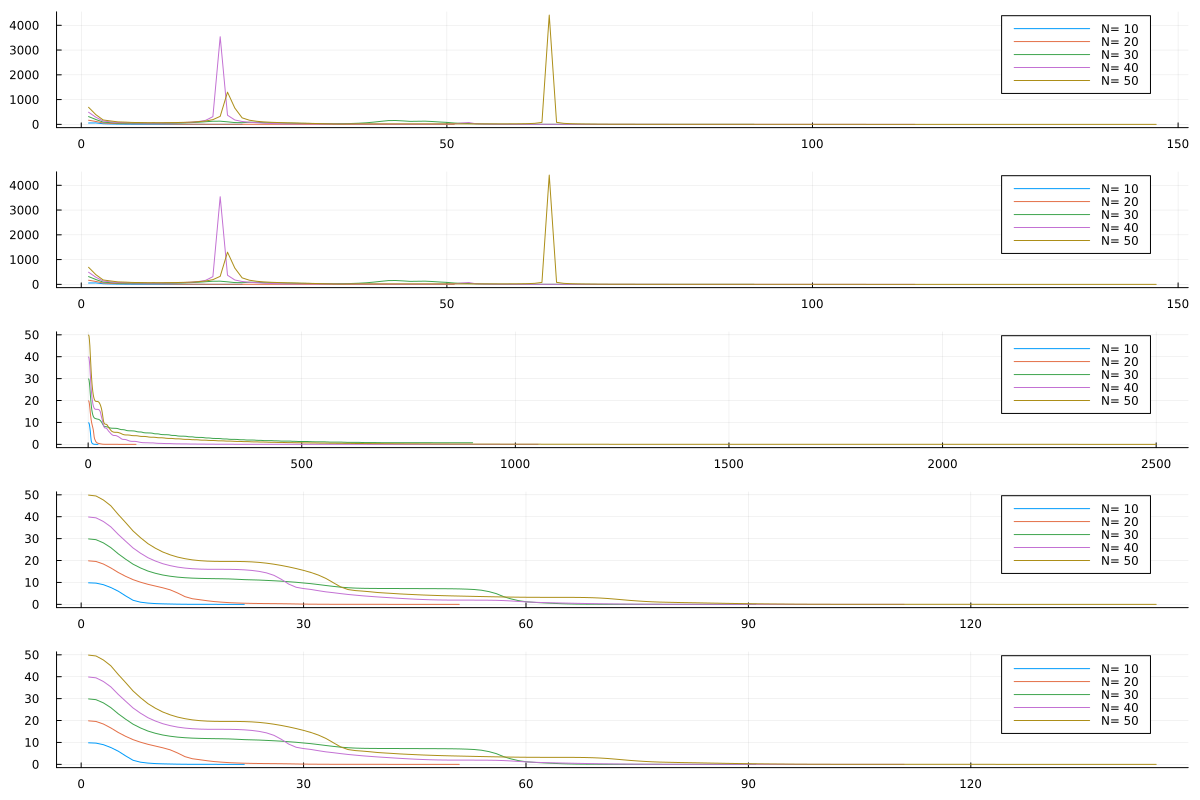

In [462]:
using Plots

# plot1 = plot(hcg,title="CG")
plot1=plot()
for (i,valor) in enumerate(n)
    aux=n[i]
    label= "N= $aux"
    x=[x for x in 1:length(HCG[i][:resnorm])];
    y=HCG[i][:resnorm];
    plot!(x,y,label=label)
end


# plot2 = plot(hbicgstabl,title="BiCGStabl")

plot2=plot()
for (i,valor) in enumerate(n)
    aux=n[i]
    label= "N= $aux"
    x=[x for x in 1:length(HCG[i][:resnorm])];
    y=HCG[i][:resnorm];;
    plot!(x,y,label=label)
end

# plot3 = plot(hgmres,title="GMRES")
plot3=plot()
for (i,valor) in enumerate(n)
    aux=n[i]
    label= "N= $aux"
    x=[x for x in 1:length(HGMRES[i][:resnorm])];
    y=HGMRES[i][:resnorm];;
    plot!(x,y,label=label)
end

# plot4 = plot(hminres,title="MinRES")
plot4=plot()
for (i,valor) in enumerate(n)
    aux=n[i]
    label= "N= $aux"
    x=[x for x in 1:length(HMINRES[i][:resnorm])];
    y=HMINRES[i][:resnorm];;
    plot!(x,y,label=label)
end



# plot5 = plot(hqmr,title="QMR")
plot5=plot()
for (i,valor) in enumerate(n)
    aux=n[i]
    label= "N= $aux"
    x=[x for x in 1:length(HQMR[i][:resnorm])];
    y=HQMR[i][:resnorm];;
    plot!(x,y,label=label)
end

layout = @layout[a ; b ; c ; d ; e]

plot(
    plot1,
    plot2,
    plot3,
    plot4,
    plot5,
    layout=layout,size=(1200,800)
)

3. Calcular tiempos y errores en base a las iteraciones de los métodos iterativos y comparar con los métodos directos

4. Analizar los resultados y decidir el métodos más rápido y preciso para cada escenario de N y α.

5. Encontrar las propiedades de las matrices generadas por la linearización en redes neuronales y proponer qué método sería el major para problemas de alta dimensionalidad .